<a href="https://colab.research.google.com/github/ribka-5/Machine-Learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

Text(0.5, 1.0, 'Blobs')

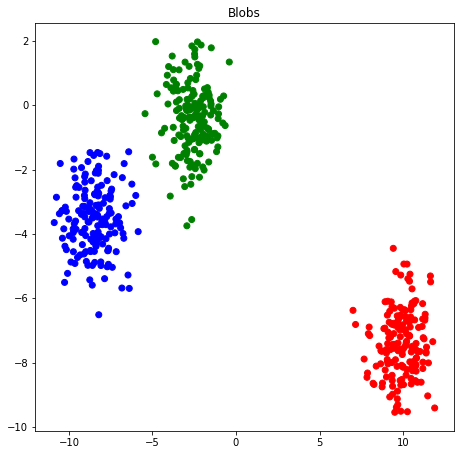

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs")

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)
kmean.cluster_centers_

array([[ 9.924822  , -7.37817319],
       [-8.49303176, -3.52460666],
       [-2.59286062, -0.40134089]])

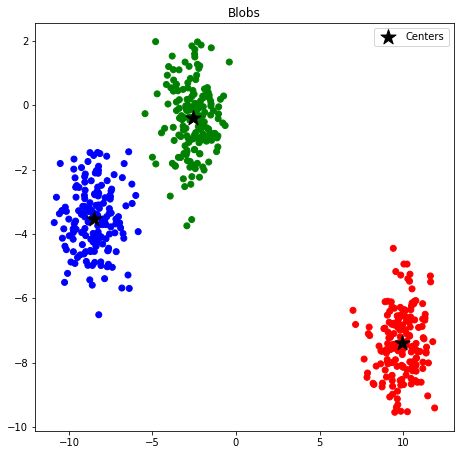

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*', s=250, color='black', label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')

In [ ]:
kmean.labels_[:5]

array([2, 0, 0, 0, 0], dtype=int32)

In [ ]:
classes[:5]

array([1, 0, 0, 0, 0])

In [ ]:
kmean.transform(blobs)[:5]

array([[13.56922462,  6.95941725,  0.79021321],
       [ 1.85638826, 20.63123092, 15.96412449],
       [ 1.30979586, 19.22802348, 15.09745355],
       [ 3.08768903, 15.75792447, 11.30425715],
       [ 2.31134697, 16.7421377 , 12.70388629]])

In [ ]:
blobs, classes = make_blobs(500, centers=3)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Blobs')

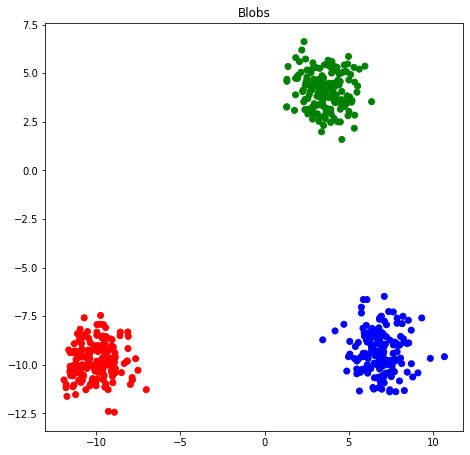

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs")

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[2.        , 0.87224249],
       [1.        , 0.82246679],
       [0.        , 0.83389203],
       [2.        , 0.88927044],
       [1.        , 0.88943788]])

In [ ]:
silhouette_samples.mean()

0.879966863058243

In [ ]:
metrics.silhouette_score(blobs, kmean.labels_)

0.879966863058243

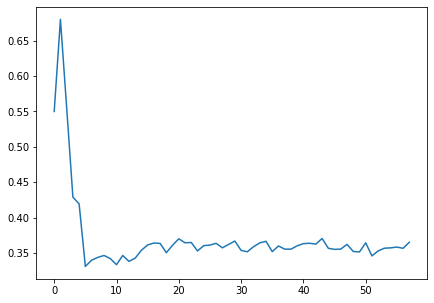

In [ ]:
blobs, classes = make_blobs(500, centers=3)
silhouette_avgs = []
for k in range(2,60):
  kmean = KMeans(n_clusters=k).fit(blobs)
  silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range(2,21):
  km = KMeans(n_clusters=n_clusters)
  preds = km.fit_predict(blobs)
  centers = km.cluster_centers_

  score = silhouette_score(blobs, preds, metric='euclidean')
  print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5499583475102472
For n_clusters = 3, silhouette score is 0.6800022689839035
For n_clusters = 4, silhouette score is 0.5575802138805707
For n_clusters = 5, silhouette score is 0.4331939011950391
For n_clusters = 6, silhouette score is 0.3165024356380818
For n_clusters = 7, silhouette score is 0.33301747467720716
For n_clusters = 8, silhouette score is 0.3382248964028299
For n_clusters = 9, silhouette score is 0.34553103331043783
For n_clusters = 10, silhouette score is 0.3472266956719164
For n_clusters = 11, silhouette score is 0.3519086316123228
For n_clusters = 12, silhouette score is 0.3407039425876916
For n_clusters = 13, silhouette score is 0.3369290834768313
For n_clusters = 14, silhouette score is 0.33739024940023193
For n_clusters = 15, silhouette score is 0.35328452981857983
For n_clusters = 16, silhouette score is 0.3552148805361251
For n_clusters = 17, silhouette score is 0.3626047395337904
For n_clusters = 18, silhouette score is 0.3

In [ ]:
wcss = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(blobs)
  wcss.append(kmean.inertia_)

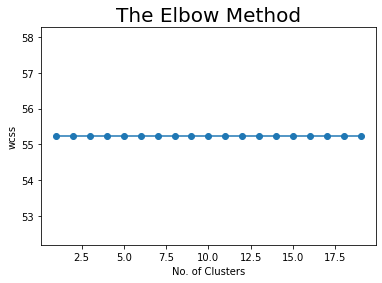

In [ ]:
plt.plot(range(1,20), wcss, marker = 'o')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Latihan 2

In [ ]:
url='https://drive.google.com/file/d/1iEAXYiXgzLOGcp_BlWWJcdEVlIG1Vx2r/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.ndim

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [ ]:
df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.dropna(subset= ['CREDIT_LIMIT'], inplace=True)

In [ ]:
df.shape

(8949, 17)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
PAYMENTS                    0
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [ ]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=500)),Range]=1
    df.loc[((df[c]>500)&(df[c]<=1000)),Range]=2
    df.loc[((df[c]>1000)&(df[c]<=3000)),Range]=3
    df.loc[((df[c]>3000)&(df[c]<=5000)),Range]=4
    df.loc[((df[c]>5000)&(df[c]<=10000)),Range]=5
    df.loc[((df[c]>10000)),Range]=6

In [ ]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10

In [ ]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=5)),Range]=1
    df.loc[((df[c]>5)&(df[c]<=10)),Range]=2
    df.loc[((df[c]>10)&(df[c]<=15)),Range]=3
    df.loc[((df[c]>15)&(df[c]<=20)),Range]=4
    df.loc[((df[c]>20)&(df[c]<=30)),Range]=5
    df.loc[((df[c]>30)&(df[c]<=50)),Range]=6
    df.loc[((df[c]>50)&(df[c]<=100)),Range]=7
    df.loc[((df[c]>100)),Range]=8

In [ ]:
for i in df:
    fig = plt.figure(figsize=(20,5))
    sns.boxplot(df[i], color='blue')
    fig.show()

In [ ]:
for i in df:
    fig = plt.figure(figsize=(20,5))
    sns.distplot(df[i], color='blue')
    fig.show()

In [ ]:
for col in df.columns:
    print(col)
    print({df[col].skew()})
    print({df[col].kurt()})
    print("-----------------------")

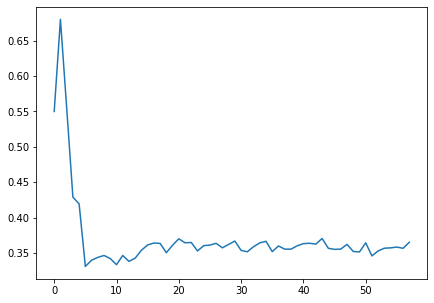

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
avgs = []
for k in range(2,15):
  kmean = KMeans(n_clusters=k).fit(df)
  avgs.append(metrics.silhouette_score(df, kmean.labels_))

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)

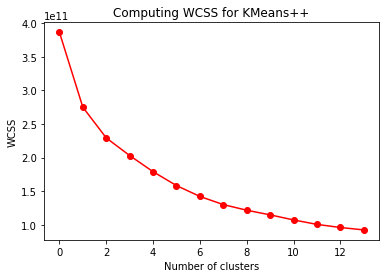

In [ ]:
vals = df.values
from sklearn.cluster import KMeans

wcss = []
for i in range( 1, 15 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300)
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )

plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,...,-1.131724,-0.655935,-0.055435,-0.785564,-0.716541,-0.704479,-0.714671,-0.553907,-0.658437,-0.698703
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,...,1.283689,1.346063,0.456580,-1.278974,-0.716541,-0.948919,0.672584,0.427936,-1.108478,0.114614
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,...,-0.326586,0.345064,0.456580,1.188074,2.489703,-0.948919,-0.714671,-0.553907,0.241644,-0.698703
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,...,-0.326586,-0.655935,0.456580,-1.032269,-0.395917,-0.948919,-0.714671,-0.553907,-0.658437,-0.698703
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,...,0.478552,1.346063,0.456580,0.447959,-0.716541,0.517724,-0.714671,-0.553907,-0.208397,-0.698703


In [ ]:
for i in df_scaled:
    fig = plt.figure(figsize=(20,5))
    sns.distplot(df[i], color='blue')
    fig.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=23)

In [ ]:
df['cluster_id'] = kmeans.labels_
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster_id
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,...,1,9,2,0,1,0,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,...,3,10,0,0,0,3,3,0,1,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,...,2,10,10,10,0,0,0,3,0,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,...,1,10,1,1,0,0,0,1,0,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,...,3,10,7,0,6,0,0,2,0,0


In [ ]:
temp_2 = ['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

for i in temp_2:
    fig = plt.figure(figsize=(20,5))
    sns.scatterplot(df['BALANCE'], df[i], hue=df['cluster_id'])
    fig.show()

Berdasarkan penentuan optimal dari metode silhouette k=2 dan metode ellbow k=3, disini k yang akan diambil adalah k-3. Berdasarkan scatterplot diatas dengan Balance sebagai variabel x, masih terdapat outlier walaupun sudah dilakukan EDA. Beberapa penyebaran pada variabel terlihat tidak dapat dipahami oleh pembaca.